# <center>CSE 258 Fall 2017 - Homework 2<center>
- - -

## <center>Xiangyuan Ren<center>
### <center> Department of Electrical and Computer Engineering <center>
### <center>Email: xir010@eng.ucsd.edu <center>


## Classifier evaluation 
### Answers Briefly with shuffle 
### (*Answers without shuffle are shown in following pages*)
* 
#### Q1:
* Accuracy on the validation set: 0.71842563148737026
* Accuracy on the test set: 0.72004559908801824 
#### Q2:
* Using new features
* Accuracy on the validation set: 0.62590748185036305
* Accuracy on the test set: 0.61960760784784308
#### Q3:
* #positives: 10254
* #true negatives: 73
* #false positives: 6243
* #false negatives: 97
* #Balanced Error Rate: 0.498906563595
#### Q4:
* Balanced Error Rate on the train set: 0.440505888296
* Balanced Error Rate on the validation set: 0.444763207313
* Balanced Error Rate on the test set: 0.433740167554
#### Q5:
* The best model: **$\lambda$** == 100
* Balanced Error Rate on the train set: 0.440827067227
* Balanced Error Rate on the validation set: 0.444881466162
* Balanced Error Rate on the test set: 0.432677468298


In [1]:
import numpy
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict
from math import exp
from math import log
import string
def ParseDataFromFile(f):
    for l in open(f):
        yield eval(l)
data=list(ParseDataFromFile("beer_50000.json"))

---
## Qestion 1: 
###           Split the data into training, validation, and test sets, via 1/3, 1/3, 1/3 splits. After training on the training set, report the accuracy of the classifier on the validation and test sets
* No shuffle data.
* feature(datum): to build the feature vector like θ0 + θ1 × ‘review/taste’ + θ2 × ‘review/appearance’ + θ3 × ‘review/aroma’+θ4 × ‘review/palate’ + θ5 × ‘review/overall
* inner(), sigmoid(), f(), frime(), train(), performance(): to use logistic regression to train and test data.

In [91]:
#numpy.random.shuffle(data)            # Shuffle Data Here

In [2]:
def feature(datum):
    feat = [1, datum['review/taste'], datum['review/appearance'], datum['review/aroma'], 
            datum['review/palate'], datum['review/overall']]
    return feat
#

X = [feature(d) for d in data]
y = [d['beer/ABV']>=6.5 for d in data]


In [3]:
def inner(x,y):
    return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
    return 1.0 / (1 + exp(-x))

# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
    loglikelihood = 0
    for i in range(len(X)):
        logit = inner(X[i], theta)
        loglikelihood -= log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= logit
    for k in range(len(theta)):
        loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
  # print("ll =" + str(loglikelihood))
    return -loglikelihood
# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
    dl = [0]*len(theta)
    for i in range(len(X)):
        logit = inner(X[i], theta)
        for k in range(len(theta)):
            dl[k] += X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] -= X[i][k]
    for k in range(len(theta)):
        dl[k] -= lam*2*theta[k]
    return numpy.array([-x for x in dl])

def train(lam):
    theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
    return theta
def performance(theta):
    
#     scores = [inner(theta,x) for x in X]
#     predictions = [s > 0 for s in scores]
#     correct = [(a==b) for (a,b) in zip(predictions,y_train)]
#     acc = sum(correct) * 1.0 / len(correct)
#     return acc
    scores_train = [inner(theta,x) for x in X_train]
    scores_validate = [inner(theta,x) for x in X_validate]
    scores_test = [inner(theta,x) for x in X_test]

    predictions_train = [s > 0 for s in scores_train]
    predictions_validate = [s >0 for s in scores_validate]
    predictions_test = [s > 0 for s in scores_test]

    correct_train = [(a==b) for (a,b) in zip(predictions_train,y_train)]
    correct_validate = [(a==b) for (a,b) in zip(predictions_validate,y_validate)]
    correct_test = [(a==b) for (a,b) in zip(predictions_test,y_test)]
  
    acc_train = sum(correct_train) * 1.0 / len(correct_train)
    acc_validate = sum(correct_validate) * 1.0 / len(correct_validate)
    acc_test = sum(correct_test) * 1.0 / len(correct_test)
    return acc_train, acc_validate, acc_test

In [4]:
X_train = X[:int(len(X)/3)]
y_train = y[:int(len(y)/3)]
X_validate = X[int(len(X)/3):int(2*len(X)/3)]
y_validate = y[int(len(y)/3):int(2*len(y)/3)]
X_test = X[int(2*len(X)/3):]
y_test = y[int(2*len(X)/3):]

In [5]:
lam = 1.0

theta = train(lam)
print "theta = ",theta
acc = performance(theta)
print("lambda = " + str(lam) + ":\taccuracy=" + str(acc))

theta =  [-4.40507927  0.59370219  0.34404315  0.81246286  0.57522903 -1.06525496]
lambda = 1.0:	accuracy=(0.66986679467178689, 0.9002819943601128, 0.57778844423111542)


#### Answer Q1:
* ( lambda is: 1.0)
* ( theta is: [-4.40507927  0.59370219  0.34404315  0.81246286  0.57522903 -1.06525496] )
* ( Accuracy on the training set: 0.66986679467178689 )
* Accuracy on the validation set: 0.9002819943601128
* Accuracy on the test set:  0.57778844423111542

* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 





---


### Q2:
### p(positive label) = σ(θ0 + θ1 × #‘lactic’ + θ2 × #‘tart’...),
* the feature function should be changed first

```
reviewcontent=datum['review/text'].translate(None, string.punctuation).lower().strip().split()

```

* Then we re-run the code again

In [6]:
def feature(datum):
    feat=[1]*11
    reviewcontent=datum['review/text'].translate(None, string.punctuation).lower()
    reviewcontent=reviewcontent.strip().split()
    featureword=["lactic","tart","sour","citric","sweet","acid","hop","fruit","salt","spicy"]
    for i in range(1,11):
        feat[i]=sum([featureword[i-1]==j for j in reviewcontent])
    return feat

In [7]:
def testlambda(lam):
    theta = train(lam)
    print "theta = ",theta
    acc = performance(theta)
    print("lambda = " + str(lam) + ":\taccuracy=" + str(acc))
    return theta
    

In [8]:
X = [feature(d) for d in data]
y = [d['beer/ABV']>=6.5 for d in data]
X_train = X[:int(len(X)/3)]
y_train = y[:int(len(y)/3)]
X_validate = X[int(len(X)/3):int(2*len(X)/3)]
y_validate = y[int(len(y)/3):int(2*len(y)/3)]
X_test = X[int(2*len(X)/3):]
y_test = y[int(2*len(X)/3):]

lam = 1.0

theta=testlambda(lam)

theta =  [ 0.0572843   0.01233175  0.04761345 -0.0954871  -0.03561509  0.28703378
  0.02399778 -0.01049852  0.40460598 -0.00519373  0.0029034 ]
lambda = 1.0:	accuracy=(0.56258250330013204, 0.94630107397852048, 0.36233275334493309)


* 
* 
* 
* 
#### Answer Q2:
* ( lambda is: 1.0)
* ( theta is: [ 0.0572843   0.01233175  0.04761345 -0.0954871  -0.03561509  0.28703378
  0.02399778 -0.01049852  0.40460598 -0.00519373  0.0029034 ] )
* ( Accuracy on the training set: 0.56258250330013204 )
* Accuracy on the validation set: 0.94630107397852048
* Accuracy on the training set:  0.36233275334493309
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 

---
### Q3:
#### Report the number of true positives, true negatives, false positives, false negatives, and the Balanced Error Rate of the classifier on the test set
* First design the function to test TP/FP/FN/TN/FPR/FNR/BER
* Then run testerror() on the test set

In [9]:
def testerror(X_test,y_test):
    scores_test = [inner(theta,x) for x in X_test]
    predictions_test = [s > 0 for s in scores_test]
    TP=sum([a and b for (a,b) in zip(predictions_test,y_test)])
    FP=sum([a and not b for (a,b) in zip(predictions_test,y_test)])
    FN=sum([not a and b for (a,b) in zip(predictions_test,y_test)])
    TN=sum([not a and not b for (a,b) in zip(predictions_test,y_test)])
    FPR=FP/float(FP+TN)
    FNR=FN/float(FN+TP)
    BER=(FPR+FNR)/2
    print "TP,FP,FN,TN:\t",TP,FP,FN,TN
    print "FPR,FNR:\t",FPR,FNR
    print "BER:\t\t",BER

In [10]:
testerror(X_test,y_test)

TP,FP,FN,TN:	5833 10549 79 206
FPR,FNR:	0.980846118085 0.0133626522327
BER:		0.497104385159


#### Answer Q3:
* #true positives: 5833
* #true negatives: 206
* #false positives: 10549
* #false negatives: 79
* #Balanced Error Rate: 0.497104385159
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 

---
### Q4:
#### Adjust the gradient ascent code provided such that the classifier would be approximately ‘balanced’ between the positive and negative classes
* First change the log-likelihood based on its label (add weights to each label)
```
if y[i]:
            loglikelihood -=N/float(2*Y1)* log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= N/float(2*Y0)*(log(1+exp(-logit))+logit)
```
* Then change the frime accordingly
```
if y[i]:
                dl[k] +=N/float(2*Y1)* X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] +=N/float(2*Y0)* X[i][k] * (1 - sigmoid(logit))
                dl[k] -=N/float(2*Y0)* X[i][k]
```
* Report the Balanced Error Rate (on the train/validation/test sets) for the new classifier

In [11]:
# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
    N=len(y)
    Y1=sum(y)
    Y0=N-Y1
    loglikelihood = 0
    for i in range(len(X)):
        logit = inner(X[i], theta)
        if y[i]:
            loglikelihood -=N/float(2*Y1)* log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= N/float(2*Y0)*(log(1+exp(-logit))+logit)
    for k in range(len(theta)):
        loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
  # print("ll =" + str(loglikelihood))
    return -loglikelihood

def fprime(theta, X, y, lam):
    N=len(y)
    Y1=sum(y)
    Y0=N-Y1
    dl = [0]*len(theta)
    for i in range(len(X)):
        logit = inner(X[i], theta)
        for k in range(len(theta)):
            if y[i]:
                dl[k] +=N/float(2*Y1)* X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] +=N/float(2*Y0)* X[i][k] * (1 - sigmoid(logit))
                dl[k] -=N/float(2*Y0)* X[i][k]
    for k in range(len(theta)):
        dl[k] -= lam*2*theta[k]
    return numpy.array([-x for x in dl])
def train(lam):
    theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
    return theta

In [12]:
lam = 1.0

theta=testlambda(lam)
# theta = train(lam)
# acc = performance(theta)
# print("lambda = " + str(lam) + ":\taccuracy=" + str(acc))

theta =  [-0.18369822  0.0100884   0.04149834 -0.08900256 -0.03354634  0.28539368
  0.02061901 -0.0121883   0.397628   -0.00474375  0.00267414]
lambda = 1.0:	accuracy=(0.55412216488659549, 0.47117057658846823, 0.5824683506329873)


In [13]:
print "TRAIN:"
testerror(X_train,y_train)

TRAIN:
TP,FP,FN,TN:	4399 2482 4949 4836
FPR,FNR:	0.339163705931 0.529418057338
BER:		0.434290881635


In [14]:
print "VALIDATE:"
testerror(X_validate,y_validate)

VALIDATE:
TP,FP,FN,TN:	7308 213 8601 545
FPR,FNR:	0.281002638522 0.540637375071
BER:		0.410820006797


In [15]:
print "TEST:"
testerror(X_test,y_test)

TEST:
TP,FP,FN,TN:	2765 3812 3147 6943
FPR,FNR:	0.354439795444 0.532307171854
BER:		0.443373483649


#### Answer Q4:
* Balanced Error Rate on the train set: 0.434290881635
* Balanced Error Rate on the validation set: 0.410820006797
* Balanced Error Rate on the test set: 0.443373483649
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 


---
### Q5:
####  Implement a training/validation/test pipeline so that you can select the best model based on its perfor- mance on the validation set.
* Run logistic-regressor on all the $\lambda$
* Pick the best $\lambda$, which has best performance

In [16]:
for lam in [0,0.01,0.1,1,100]:
    theta=testlambda(lam)
    print

theta =  [-0.18406845  0.0101521   0.04172871 -0.08943733 -0.03373912  0.28564164
  0.02075214 -0.0121393   0.39903665 -0.00477337  0.00269198]
lambda = 0:	accuracy=(0.55406216248649942, 0.47063058738825225, 0.58258834823303529)

theta =  [-0.18406474  0.01015146  0.0417264  -0.08943296 -0.03373718  0.28563915
  0.0207508  -0.0121398   0.3990225  -0.00477308  0.0026918 ]
lambda = 0.01:	accuracy=(0.55412216488659549, 0.47117057658846823, 0.5824683506329873)

theta =  [-0.18403135  0.0101457   0.04170556 -0.08939365 -0.03371974  0.28561682
  0.02073876 -0.01214423  0.39889526 -0.0047704   0.00269019]
lambda = 0.1:	accuracy=(0.55412216488659549, 0.47117057658846823, 0.5824683506329873)

theta =  [-0.18369822  0.0100884   0.04149834 -0.08900256 -0.03354634  0.28539368
  0.02061901 -0.0121883   0.397628   -0.00474375  0.00267414]
lambda = 1:	accuracy=(0.55412216488659549, 0.47117057658846823, 0.5824683506329873)

theta =  [-0.15422583  0.00577634  0.025877   -0.05942604 -0.0204902   0.26214

---
#### When lambda=100, I have best performance on  validation set, which is 0.47159056818863621. So, I pick it as my best model


In [17]:
theta=testlambda(100)
print "TRAIN:"
testerror(X_train,y_train)
print "VALIDATE:"
testerror(X_validate,y_validate)
print "TEST:"
testerror(X_test,y_test)

theta =  [-0.15422583  0.00577634  0.025877   -0.05942604 -0.0204902   0.26214925
  0.011632   -0.01279203  0.29805519 -0.00273439  0.00153136]
lambda = 100:	accuracy=(0.55418216728669145, 0.47159056818863621, 0.58222835543289131)
TRAIN:
TP,FP,FN,TN:	4404 2486 4944 4832
FPR,FNR:	0.339710303362 0.528883183569
BER:		0.434296743465
VALIDATE:
TP,FP,FN,TN:	7315 213 8594 545
FPR,FNR:	0.281002638522 0.540197372556
BER:		0.410600005539
TEST:
TP,FP,FN,TN:	2768 3819 3144 6936
FPR,FNR:	0.355090655509 0.531799729364
BER:		0.443445192437


#### Q5:
* The best model: **$\lambda$** = 100
* Balanced Error Rate on the train set: 0.434296743465
* Balanced Error Rate on the validation set: 0.410600005539
* Balanced Error Rate on the test set: 0.443445192437

* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 

---
## Part II: Dimensionality reduction
### Q6:
#### Find and report the PCA components 
* First get the 10-d data:
```
X10d=[x[1:] for x in X]
```
* Then report PCA for 1-10components

In [18]:
X_train = X[:int(len(X)/3)]
X10d=[x[1:] for x in X_train]

In [20]:
for i in range(1,4+1):
    pca = PCA(n_components=i)
    pca.fit(X10d)
    print "When n_components=",i,'\n',pca.components_,'\n'

When n_components= 1 
[[ -5.99348611e-04   3.95180460e-03  -9.30313126e-03   9.77013461e-03
    7.99743141e-01  -1.15982082e-04   5.94935746e-01   7.26421070e-02
    1.73560182e-04   3.14239951e-02]] 

When n_components= 2 
[[ -5.99348611e-04   3.95180460e-03  -9.30313126e-03   9.77013461e-03
    7.99743141e-01  -1.15982082e-04   5.94935746e-01   7.26421070e-02
    1.73560182e-04   3.14239951e-02]
 [ -1.57703251e-03  -8.65486079e-03  -1.41729712e-02   1.36618507e-02
   -5.96957130e-01   2.48551765e-04   8.01904848e-01  -3.25375266e-03
   -1.24914732e-03   1.06619909e-02]] 

When n_components= 3 
[[ -5.99348611e-04   3.95180460e-03  -9.30313126e-03   9.77013461e-03
    7.99743141e-01  -1.15982082e-04   5.94935746e-01   7.26421070e-02
    1.73560182e-04   3.14239951e-02]
 [ -1.57703251e-03  -8.65486079e-03  -1.41729712e-02   1.36618507e-02
   -5.96957130e-01   2.48551765e-04   8.01904848e-01  -3.25375266e-03
   -1.24914732e-03   1.06619909e-02]
 [  4.00311919e-03   4.43650130e-02   9.063

In [21]:
for i in range(5,7+1):
    pca = PCA(n_components=i)
    pca.fit(X10d)
    print "When n_components=",i,'\n',pca.components_,'\n'


When n_components= 5 
[[ -5.99348611e-04   3.95180460e-03  -9.30313126e-03   9.77013461e-03
    7.99743141e-01  -1.15982082e-04   5.94935746e-01   7.26421070e-02
    1.73560182e-04   3.14239951e-02]
 [ -1.57703251e-03  -8.65486079e-03  -1.41729712e-02   1.36618507e-02
   -5.96957130e-01   2.48551765e-04   8.01904848e-01  -3.25375266e-03
   -1.24914732e-03   1.06619909e-02]
 [  4.00311919e-03   4.43650130e-02   9.06341269e-02   3.63555020e-03
   -6.10090802e-02  -2.42559237e-04  -3.98261666e-02   9.91605188e-01
    3.81500215e-04   3.46218809e-02]
 [ -4.26440126e-04   2.28634173e-02  -1.25300143e-02   1.95012054e-02
   -1.68370978e-02  -1.59706556e-04  -2.62603663e-02  -3.68946765e-02
    2.69012381e-03   9.98297656e-01]
 [  2.60661794e-02   2.24900160e-01   9.68807960e-01   3.42563694e-03
    3.00250324e-03   9.49375889e-03   2.13269955e-02  -9.78249427e-02
    7.56407137e-04   3.94909560e-03]] 

When n_components= 6 
[[ -5.99348611e-04   3.95180460e-03  -9.30313126e-03   9.77013461e-0

In [22]:
for i in range(8,10+1):
    pca = PCA(n_components=i)
    pca.fit(X10d)
    print "When n_components=",i,'\n',pca.components_,'\n'


When n_components= 8 
[[ -5.99348611e-04   3.95180460e-03  -9.30313126e-03   9.77013461e-03
    7.99743141e-01  -1.15982082e-04   5.94935746e-01   7.26421070e-02
    1.73560182e-04   3.14239951e-02]
 [ -1.57703251e-03  -8.65486079e-03  -1.41729712e-02   1.36618507e-02
   -5.96957130e-01   2.48551765e-04   8.01904848e-01  -3.25375266e-03
   -1.24914732e-03   1.06619909e-02]
 [  4.00311919e-03   4.43650130e-02   9.06341269e-02   3.63555020e-03
   -6.10090802e-02  -2.42559237e-04  -3.98261666e-02   9.91605188e-01
    3.81500215e-04   3.46218809e-02]
 [ -4.26440126e-04   2.28634173e-02  -1.25300143e-02   1.95012054e-02
   -1.68370978e-02  -1.59706556e-04  -2.62603663e-02  -3.68946765e-02
    2.69012381e-03   9.98297656e-01]
 [  2.60661794e-02   2.24900160e-01   9.68807960e-01   3.42563694e-03
    3.00250324e-03   9.49375889e-03   2.13269955e-02  -9.78249427e-02
    7.56407137e-04   3.94909560e-03]
 [  3.22021761e-02   9.72157312e-01  -2.28841275e-01   1.09560490e-02
   -6.07572126e-03   1.

* 
* 
---
### Q7:
#### Suppose we want to compress the data using just two PCA dimensions. How large is the reconstruction error when doing so
* Get the 2-d data and the reconstruction:
```
X_train_pca = pca.transform(X10d)
X_projected = pca.inverse_transform(X_train_pca)
```
* Calculate the reconstruction error
```
loss = ((X10d - X_projected) ** 2).mean()
```

In [24]:
pca = PCA(n_components=2)
pca.fit(X10d)
X_train_pca = pca.transform(X10d)
X_projected = pca.inverse_transform(X_train_pca)
loss = ((X10d - X_projected) ** 2).mean()
print loss

0.0475013035966


#### Answer Q7:
* the reconstruction error is: 0.0475013035966



---
### Q8:
#### make a 2-d scatterplot showing the difference between ‘American IPA’ style beers versus all other styles* Get the 2-d data and the reconstruction:
* First split the 2-d into X and Y:
```
x =X_train_pca[:,0]  
y =X_train_pca[:,1] 
```
* Then get the color according to its label
```
cValue = []
for i in C:
    if i==1:
        cValue.append('r')
    else:
        cValue.append('b')
```
* Using **matplotlib.pyplot** to plot

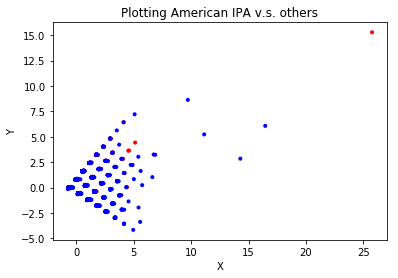

In [25]:
import matplotlib.pyplot as plt
x =X_train_pca[:,0]  
y =X_train_pca[:,1] 
C=[0]*(50000/3)
for i in range(50000/3):
    if data[i]['beer/style']== 'American IPA':
        C[i]=1
fig = plt.figure()  
ax1 = fig.add_subplot(111)  

ax1.set_title('Plotting American IPA v.s. others')  
plt.xlabel('X')  
plt.ylabel('Y')  

cValue = []
for i in C:
    if i==1:
        cValue.append('r')
    else:
        cValue.append('b')

ax1.scatter(x,y,c=cValue,marker='.')   
plt.show() 